In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import re
import string
from spellchecker import SpellChecker
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('data/data1.csv')
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Number of replies,Time
0,Theresa Musser,I have been following the Lord Jesus Christ fo...,Against,YOBAH,159,7 replies,8 months ago
1,b camp,"As a non believer, I didn't know the Bible. Th...",Against,NaN,687,129 replies,8 months ago
2,Linda Anglin,"I am an evangelical, born again believer who l...",For,NaN,112,11 replies,8 months ago
3,Joshua,I have to say. I watched the chosen when I was...,Against,NaN,118,3 replies,8 months ago
4,mrtonality,"As a Chosen viewer, I never put that show over...",Against,NaN,18,NaN,8 months ago


In [3]:
# droping some records
df = df[df['Sentiment'] != 'Drop']
df = df[df['Sentiment'] != 'Neutral']
df.shape

(739, 7)

In [4]:
df.isna().sum()

Name                   0
Comments               0
Sentiment              0
Assigned to          735
Likes                  0
Number of replies    662
Time                   0
dtype: int64

In [5]:
len(df)

739

In [6]:
df = df.drop(columns=['Number of replies'])
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Time
0,Theresa Musser,I have been following the Lord Jesus Christ fo...,Against,YOBAH,159,8 months ago
1,b camp,"As a non believer, I didn't know the Bible. Th...",Against,NaN,687,8 months ago
2,Linda Anglin,"I am an evangelical, born again believer who l...",For,NaN,112,8 months ago
3,Joshua,I have to say. I watched the chosen when I was...,Against,NaN,118,8 months ago
4,mrtonality,"As a Chosen viewer, I never put that show over...",Against,NaN,18,8 months ago


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 802
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         739 non-null    object
 1   Comments     739 non-null    object
 2   Sentiment    739 non-null    object
 3   Assigned to  4 non-null      object
 4   Likes        739 non-null    int64 
 5   Time         739 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.4+ KB


In [8]:
df['Time'].value_counts()

Time
8 months ago             402
5 months ago              64
8 months ago (edited)     54
4 months ago              53
7 months ago              48
3 months ago              26
1 month ago               21
2 months ago              19
6 months ago              10
7 months ago (edited)      7
5 months ago (edited)      7
2 weeks ago                5
4 months ago (edited)      4
3 months ago (edited)      4
3 weeks ago                2
2 months ago (edited)      2
14 hours ago               1
1 month ago (edited)       1
3 days ago                 1
1 day ago                  1
5 days ago                 1
2 days ago                 1
6 days ago (edited)        1
20 hours ago               1
11 days ago                1
13 days ago                1
8 days ago                 1
Name: count, dtype: int64

In [9]:
def to_date(time):
    # time = time.strip()
    date = int(dt.datetime(2023, 4, 20).strftime('%m'))
    if time[2:] == 'months ago' or time[2:] == 'month ago' or time[2:] == 'months ago (edited)' or time[2:] == 'month ago (edited)':
        monthval = date - int(time[0])
        if monthval <= 0:
            monthval = monthval + 12
            return calendar.month_name[monthval]+', 2022'
        else :
            return calendar.month_name[monthval]+', 2023'
        
    elif time[2:] == 'days ago' or time[2:] == 'day ago' or time[2:] == 'days ago (edited)' or time[2:] == 'day ago (edited)':
        date = dt.datetime(2023, 4, 20)
        dayval = int(date.strftime('%d')) - int(time[0])
        if dayval <= 0:
            if int(date.strftime('%m')) == 1:
                return calendar.month_name[12]+', 2022'
            else:
                return calendar.month_name[int(date.strftime('%m')) - 1]+', 2023'
        else:
                return calendar.month_name[int(date.strftime('%m'))]+', 2023'
    
    elif time[2:] == 'weeks ago' or time[2:] == 'week ago' or time[2:] == 'weeks ago (edited)' or time[2:] == 'week ago (edited)':
        date = dt.datetime(2023, 4, 20)
        if int(time[0]) == 1:
            dayval = int(date.strftime('%d')) - 7
        elif int(time[0]) == 2:
            dayval = int(date.strftime('%d')) - 14
        else:
            dayval = int(date.strftime('%d')) - 21
        if dayval <= 0:
            if int(date.strftime('%m')) == 1:
                return calendar.month_name[12]+', 2022'
            else:
                return calendar.month_name[int(date.strftime('%m')) - 1]+', 2023'
        else:
            return calendar.month_name[int(date.strftime('%m'))]+', 2023'
    
    else:
        date = dt.datetime(2023, 4, 20)
        return calendar.month_name[int(date.strftime('%m'))]+', 2023'

In [10]:
df['Time'] = df['Time'].apply(to_date)
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Time
0,Theresa Musser,I have been following the Lord Jesus Christ fo...,Against,YOBAH,159,"August, 2022"
1,b camp,"As a non believer, I didn't know the Bible. Th...",Against,NaN,687,"August, 2022"
2,Linda Anglin,"I am an evangelical, born again believer who l...",For,NaN,112,"August, 2022"
3,Joshua,I have to say. I watched the chosen when I was...,Against,NaN,118,"August, 2022"
4,mrtonality,"As a Chosen viewer, I never put that show over...",Against,NaN,18,"August, 2022"


In [11]:
df['Time'].value_counts().sum()

739

In [12]:
df.isna().sum()

Name             0
Comments         0
Sentiment        0
Assigned to    735
Likes            0
Time             0
dtype: int64

In [13]:
df['Time'].value_counts()

Time
August, 2022       456
November, 2022      71
December, 2022      57
September, 2022     55
January, 2023       30
March, 2023         24
February, 2023      21
April, 2023         15
October, 2022       10
Name: count, dtype: int64

In [14]:
len(df)

739

In [15]:
def seperate_month_year(timestr):
    month, year = timestr.split(',')
    return pd.Series([month, year])

In [16]:
df[['Month', 'Year']] = df['Time'].apply(seperate_month_year)
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Time,Month,Year
0,Theresa Musser,I have been following the Lord Jesus Christ fo...,Against,YOBAH,159,"August, 2022",August,2022
1,b camp,"As a non believer, I didn't know the Bible. Th...",Against,NaN,687,"August, 2022",August,2022
2,Linda Anglin,"I am an evangelical, born again believer who l...",For,NaN,112,"August, 2022",August,2022
3,Joshua,I have to say. I watched the chosen when I was...,Against,NaN,118,"August, 2022",August,2022
4,mrtonality,"As a Chosen viewer, I never put that show over...",Against,NaN,18,"August, 2022",August,2022


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 802
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         739 non-null    object
 1   Comments     739 non-null    object
 2   Sentiment    739 non-null    object
 3   Assigned to  4 non-null      object
 4   Likes        739 non-null    int64 
 5   Time         739 non-null    object
 6   Month        739 non-null    object
 7   Year         739 non-null    object
dtypes: int64(1), object(7)
memory usage: 52.0+ KB


In [18]:
df = df.drop(columns=['Time'])
df['Year'] = df['Year'].astype('int64')
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Month,Year
0,Theresa Musser,I have been following the Lord Jesus Christ fo...,Against,YOBAH,159,August,2022
1,b camp,"As a non believer, I didn't know the Bible. Th...",Against,NaN,687,August,2022
2,Linda Anglin,"I am an evangelical, born again believer who l...",For,NaN,112,August,2022
3,Joshua,I have to say. I watched the chosen when I was...,Against,NaN,118,August,2022
4,mrtonality,"As a Chosen viewer, I never put that show over...",Against,NaN,18,August,2022


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 802
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         739 non-null    object
 1   Comments     739 non-null    object
 2   Sentiment    739 non-null    object
 3   Assigned to  4 non-null      object
 4   Likes        739 non-null    int64 
 5   Month        739 non-null    object
 6   Year         739 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 46.2+ KB


In [20]:
df['Year'].value_counts()

Year
2022    649
2023     90
Name: count, dtype: int64

In [21]:
df['Month'].value_counts()

Month
August       456
November      71
December      57
September     55
January       30
March         24
February      21
April         15
October       10
Name: count, dtype: int64

In [22]:
def replacespl(comment):
    comment = comment.replace('“', '"').replace('”', '"').replace('’','\'').replace('\n', ' ').replace('‭', '').replace('‬', '')
    return comment

df['Comments'] = df['Comments'].apply(replacespl)
df['Comments']

0      I have been following the Lord Jesus Christ fo...
1      As a non believer, I didn't know the Bible. Th...
2      I am an evangelical, born again believer who l...
3      I have to say. I watched the chosen when I was...
4      As a Chosen viewer, I never put that show over...
                             ...                        
797    This dude does not understand the theology of ...
798                       This is such a bad video bro L
799    Sola scriptura is not biblical. The early chur...
801          Catholicism is not a work based system lol.
802    Right off the get go you make a blatant lie ab...
Name: Comments, Length: 739, dtype: object

In [23]:
# Define a function to correct the spelling of a comment
def correct_comment_spelling(comment):

    spell = SpellChecker()
    # Split the comment into individual words
    words = comment.split()
    # print(words)
    # Create a set of misspelled words
    misspelled = spell.unknown(words)
    # Replace each misspelled word with its most likely correction
    for word in misspelled:
        correction = spell.correction(word)
        print(word, correction)
        if correction == None:
            comment = comment.replace(word, '')
        else:
            comment = comment.replace(word, correction)
    # Return the corrected comment
    return comment

df['Comments'] = df['Comments'].apply(correct_comment_spelling)

life. life
lacking. lacking
"risen", None
apostles. apostles
"ben ben
jesus, jesus
emmaus", None
bible, bible
however, however
told", told
blasphemous. blasphemous
far, far
people, people
great. great
great, great
robe", robe
60+ None
others. others
yes, yes
years. years
show. show
hur", hurt
value. value
it. it
be. be
flawed, flawed
glitches, glitches
were, were
gospel. gospel
"christian" christian
thought, thought
friends. friends
fiction. fiction
edifying, edifying
tv to
him. him
you, you
good. good
"the the
different. different
had. had
now. now
bible. bible
believer, believer
savior. savior
entertainment" entertainment
jesus, jesus
"biblically biblically
1! i
study, study
up! up
evangelical, evangelical
enough! enough
however, however
need…jesus None
people, people
again. again
period! period
word. word
background, background
read/listen None
say. say
issue. issue
direction! direction
said. said
real! real
viewer, viewers
lord. lord
say. say
ministry...be None
church. church
cunni

In [24]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Comments']=df['Comments'].apply(lambda x:expand_contractions(x))

In [25]:
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Month,Year
0,Theresa Musser,I have been following the Lord Jesus Christ fo...,Against,YOBAH,159,August,2022
1,b camp,As a non believer I did not know the Bible. Th...,Against,NaN,687,August,2022
2,Linda Anglin,I am an evangelical born again believer who lo...,For,NaN,112,August,2022
3,Joshua,I have to say I watched the chosen when I was ...,Against,NaN,118,August,2022
4,mrtonality,As a Chosen viewers I never put that show over...,Against,NaN,18,August,2022


In [26]:
df['Comments']=df['Comments'].apply(lambda x: x.lower())

In [27]:

df['Comments']=df['Comments'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [28]:
df['Comments']=df['Comments'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [29]:
# Removing extra spaces
df['Comments']=df['Comments'].apply(lambda x: re.sub(' +',' ',x))

In [30]:
df.tail(60)

,Name,Comments,Sentiment,Assigned to,Likes,Month,Year
738,POWER1LINER,so we cannot have a show about jesus how are y...,Against,NaN,0,August,2022
739,Freetobeme Me,havent watched not drawn to it,For,NaN,0,August,2022
740,Billy Briese,he want his entire church to unify like him an...,Against,NaN,0,September,2022
741,George W,how is a influencing the content of the show d...,Against,NaN,0,August,2022
742,Shawna Roachford,you could not pay me to watch the chosen i kno...,For,NaN,0,November,2022
743,Scott Wills,horror it does not meet todd is approval clutc...,Against,NaN,0,December,2022
744,Man Of Faith,i stopped watching after learning of mormon in...,For,NaN,2,August,2022
745,Running Soulja,i do not get it the bible we use are all picke...,Against,NaN,0,February,2023
746,Daniel Moore,and our catholic theology is not based on a wo...,Against,NaN,0,September,2022
747,Don Blosser,actually i do not get it and how can jenkins c...,For,NaN,0,November,2022


In [31]:
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

In [32]:
# Loading model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['Comments']=df['Comments'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [33]:
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Month,Year
0,Theresa Musser,follow lord jesus christ year watch robe ben h...,Against,YOBAH,159,August,2022
1,b camp,non believer know bible choose help interested...,Against,NaN,687,August,2022
2,Linda Anglin,evangelical bear believer love choose episode ...,For,NaN,112,August,2022
3,Joshua,watch choose sort year long dry spell spark in...,Against,NaN,118,August,2022
4,mrtonality,choose viewer accuracy scripture scripture tru...,Against,NaN,18,August,2022


In [34]:
df_grouped=df[['Name','Comments']].groupby(by='Name').agg(lambda x:' '.join(x))
df_grouped.head()

,Comments
Name,
\n Near 2 Infinity\n,jesus god john
\n Vision unSEALED\n,watch previous episode concern video give lot ...
\n Xeen Music\n,factual early church reject book list give fac...
#YahwehsDaughter Romans1:16,watch not plan know good intention agree make ...
1211foster,concerned watch scene writer video bit content...


In [35]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['Comments'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,abandon,ability,able,aboui,abraham,absolute,absolutely,absorb,absurdity,academic,...,you,young,youngster,youth,youtube,yr,yrs,yt,yup,zero
Name,,,,,,,,,,,,,,,,,,,,,
\n Near 2 Infinity\n,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
\n Vision unSEALED\n,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
\n Xeen Music\n,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
val = df_dtm.columns
val = val.to_frame()
val.to_csv('file.csv')

In [37]:
# combining year and month
df['time'] = df['Year'].astype(str) + " " +  df['Month']

In [38]:
# unique time
df['time'].unique()

array(['2022 August', '2022 December', '2023 February', '2022 November',
       '2022 September', '2023 March', '2023 January', '2023 April',
       '2022 October'], dtype=object)

In [39]:
# ordinal encoding
mapper = {
    '2022 August': 1,
    '2022 September': 2,
    '2022 October': 3,
    '2022 November': 4,
    '2022 December': 5,
    '2023 January': 6,
    '2023 February': 7,
    '2023 March': 8,
    '2023 April': 9
}

df['time'] = df['time'].map(mapper)
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Month,Year,time
0,Theresa Musser,follow lord jesus christ year watch robe ben h...,Against,YOBAH,159,August,2022,1
1,b camp,non believer know bible choose help interested...,Against,NaN,687,August,2022,1
2,Linda Anglin,evangelical bear believer love choose episode ...,For,NaN,112,August,2022,1
3,Joshua,watch choose sort year long dry spell spark in...,Against,NaN,118,August,2022,1
4,mrtonality,choose viewer accuracy scripture scripture tru...,Against,NaN,18,August,2022,1


# EDA

In [40]:
import seaborn as sns
from wordcloud import WordCloud

In [41]:
# shape
df.shape

(739, 8)

### Frequency distribution of sentiments

Text(0, 0.5, 'Frequencies')

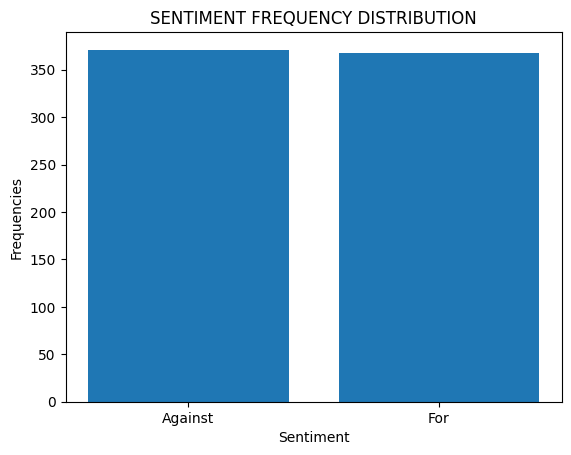

In [42]:
plt.bar(x=df['Sentiment'].value_counts().index, height=df['Sentiment'].value_counts().values)
plt.title("SENTIMENT FREQUENCY DISTRIBUTION")
plt.xlabel("Sentiment")
plt.ylabel("Frequencies")

### Word cloud for each sentiment

In [43]:
# filtering comments
for_comments = df[df['Sentiment'] == 'For']['Comments']
against_comments = df[df['Sentiment'] == 'Against']['Comments']
neutral_comments = df[df['Sentiment'] == 'Neutral']['Comments']

In [44]:
# merging all string into one
for_string = " ".join(for_comments.values)
against_string = " ".join(against_comments.values)
neutral_string = " ".join(neutral_comments.values)

In [45]:
# creating word cloud object
wc = WordCloud(background_color="white", )

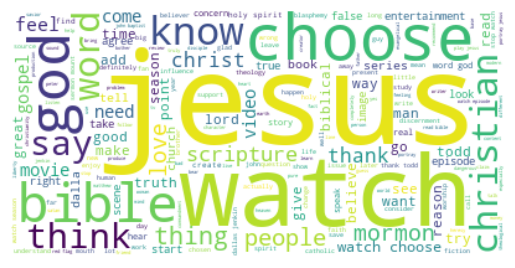

In [46]:
wc.generate(for_string)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

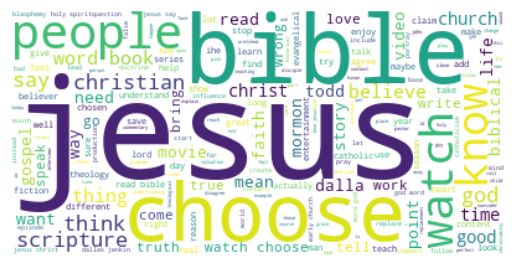

In [47]:
wc.generate(against_string)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [48]:
# wc.generate(neutral_string)
# plt.axis('off')
# plt.imshow(wc, interpolation='bilinear')
# plt.show()

# Frequency of comments over time (year, month)

Text(0, 0.5, 'Frequency')

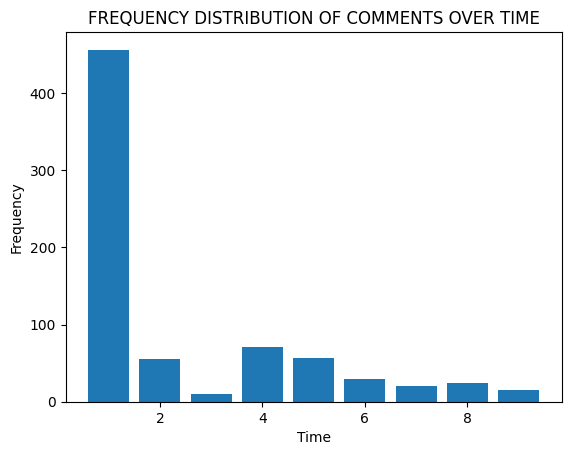

In [49]:
freq_comments_over_time = df[['Comments', 'time']].groupby('time').count().reset_index()
plt.bar(x=freq_comments_over_time['time'], height=freq_comments_over_time['Comments'])
plt.title("FREQUENCY DISTRIBUTION OF COMMENTS OVER TIME")
plt.xlabel("Time")
plt.ylabel('Frequency')

### Comment length per sentiment

Text(0, 0.5, 'Number of words per comment')

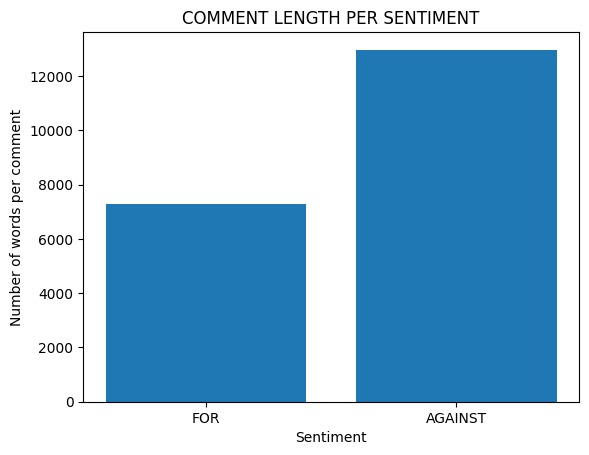

In [50]:
plt.bar(x=['FOR', 'AGAINST'], height=[
    len(for_string.split(' ')), 
    len(against_string.split(' '))])
plt.title("COMMENT LENGTH PER SENTIMENT")
plt.xlabel('Sentiment')
plt.ylabel('Number of words per comment')

# Likes per sentiment

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 802
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         739 non-null    object
 1   Comments     739 non-null    object
 2   Sentiment    739 non-null    object
 3   Assigned to  4 non-null      object
 4   Likes        739 non-null    int64 
 5   Month        739 non-null    object
 6   Year         739 non-null    int64 
 7   time         739 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 52.0+ KB


Text(0, 0.5, 'Number of likes')

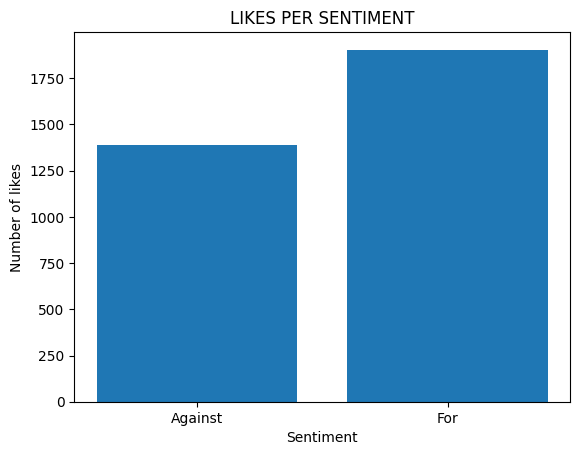

In [52]:
likes_sum = df[['Sentiment', 'Likes']].groupby(['Sentiment']).sum()
plt.bar(x=likes_sum.index, height=likes_sum.values[ : , 0])
plt.title("LIKES PER SENTIMENT")
plt.xlabel("Sentiment")
plt.ylabel("Number of likes")

### Number of comments per sentiment over time

Text(0, 0.5, 'Number of comments')

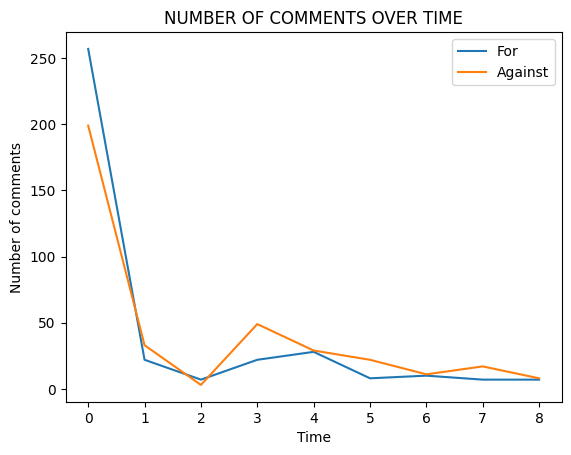

In [53]:
plt.plot(df[df['Sentiment'] == 'For'][['Comments', 'time']].groupby('time').count().values)
plt.plot(df[df['Sentiment'] == 'Against'][['Comments', 'time']].groupby('time').count().values)

plt.legend(['For', 'Against'])
plt.title('NUMBER OF COMMENTS OVER TIME')
plt.xlabel('Time')
plt.ylabel('Number of comments')

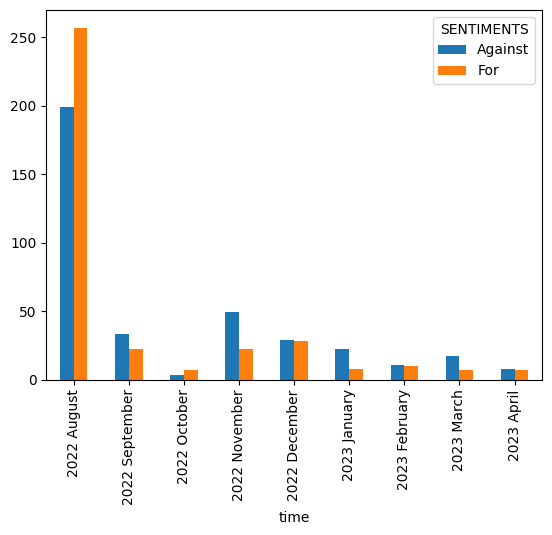

In [54]:
df[['time', 'Sentiment', 'Comments']].groupby(['time', 'Sentiment']).count().unstack().plot(kind='bar')
plt.xticks(list(range(0,9)), list(mapper.keys()))
plt.legend(['Against', 'For'], title="SENTIMENTS")
pass

# Model building

In [55]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
tfidf = TfidfVectorizer()
data = tfidf.fit_transform(df['Comments'])
df_dtm_tfidf = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm_tfidf

,abandon,ability,able,aboui,abraham,absolute,absolutely,absorb,absurdity,academic,...,you,young,youngster,youth,youtube,yr,yrs,yt,yup,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_dtm_tfidf, df['Sentiment'], 
    stratify=df['Sentiment'], 
    random_state=42,
    test_size=0.2
)

In [58]:
df_dtm_tfidf.shape

(739, 3419)

In [59]:
df['Sentiment'].shape

(739,)

In [60]:
# model building an training
naive_nlp = MultinomialNB()
naive_nlp.fit(X_train, y_train)

MultinomialNB()

In [74]:
print(classification_report(y_test, naive_nlp.predict(X_test)))

              precision    recall  f1-score   support

     Against       0.76      0.88      0.82        74
         For       0.86      0.73      0.79        74

    accuracy                           0.80       148
   macro avg       0.81      0.80      0.80       148
weighted avg       0.81      0.80      0.80       148



In [76]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, naive_nlp.predict(X_test))
print(cf_matrix)

[[65  9]
 [20 54]]


<Axes: >

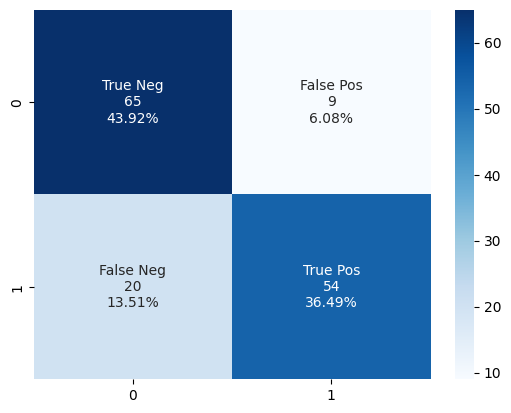

In [79]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Subjectivity and Polarity scores

In [63]:
from textblob import TextBlob

In [64]:
df['polarity_score'] = df['Comments'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['subjectivity_score'] = df['Comments'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [65]:
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Month,Year,time,polarity_score,subjectivity_score
0,Theresa Musser,follow lord jesus christ year watch robe ben h...,Against,YOBAH,159,August,2022,1,0.294928,0.486957
1,b camp,non believer know bible choose help interested...,Against,NaN,687,August,2022,1,0.092857,0.685714
2,Linda Anglin,evangelical bear believer love choose episode ...,For,NaN,112,August,2022,1,0.133333,0.191667
3,Joshua,watch choose sort year long dry spell spark in...,Against,NaN,118,August,2022,1,-0.061846,0.537121
4,mrtonality,choose viewer accuracy scripture scripture tru...,Against,NaN,18,August,2022,1,0.350000,0.650000


# polarity score distribuation per sentiment

Text(0, 0.5, 'Frequency')

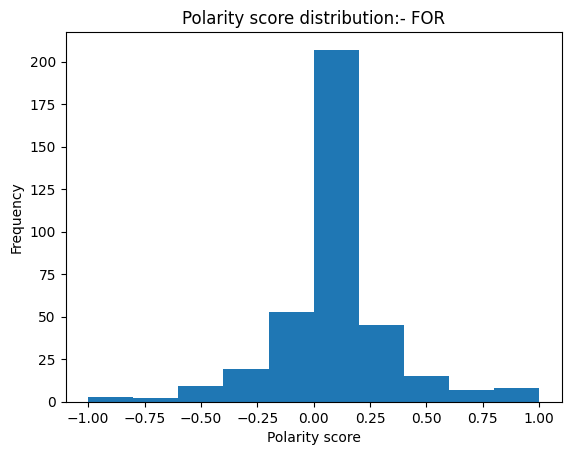

In [66]:
plt.hist(df[df['Sentiment'] == 'For']['polarity_score'])
plt.title("Polarity score distribution:- FOR")
plt.xlabel("Polarity score")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

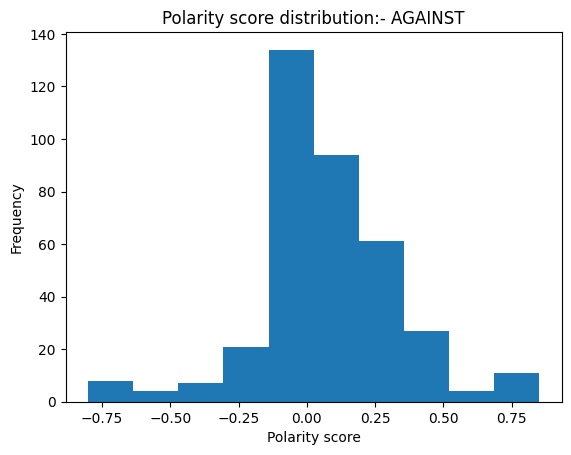

In [67]:
plt.hist(df[df['Sentiment'] == 'Against']['polarity_score'])
plt.title("Polarity score distribution:- AGAINST")
plt.xlabel("Polarity score")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

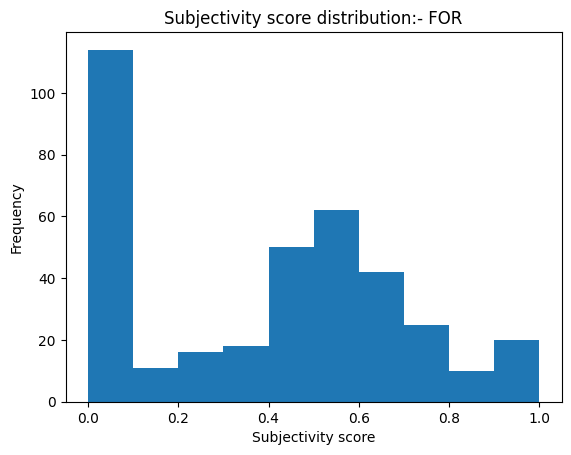

In [68]:
plt.hist(df[df['Sentiment'] == 'For']['subjectivity_score'])
plt.title("Subjectivity score distribution:- FOR")
plt.xlabel("Subjectivity score")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

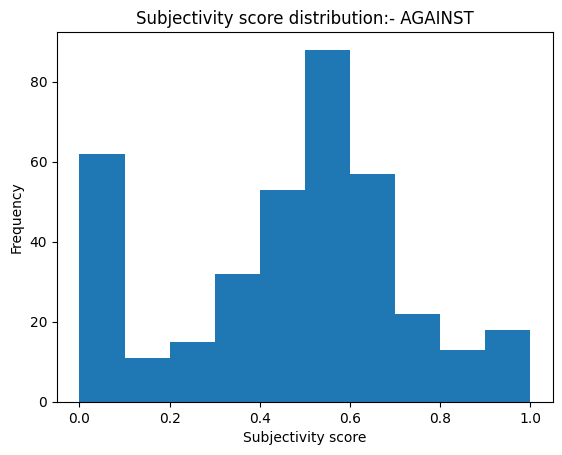

In [69]:
plt.hist(df[df['Sentiment'] == 'Against']['subjectivity_score'])
plt.title("Subjectivity score distribution:- AGAINST")
plt.xlabel("Subjectivity score")
plt.ylabel("Frequency")

# Hypothesis Testing
* Null Hypothesis (H0): The average likes with positive sentiment on comments is same as the average likes with negative sentiment on comments.
* Alternate Hypothesis (H1): The average likes with positive sentiment on comments is different the average likes with negative sentiment on comments.

In [70]:
df['Sentiment'] = pd.factorize(df['Sentiment'])[0]

In [71]:
df.head()

,Name,Comments,Sentiment,Assigned to,Likes,Month,Year,time,polarity_score,subjectivity_score
0,Theresa Musser,follow lord jesus christ year watch robe ben h...,0,YOBAH,159,August,2022,1,0.294928,0.486957
1,b camp,non believer know bible choose help interested...,0,NaN,687,August,2022,1,0.092857,0.685714
2,Linda Anglin,evangelical bear believer love choose episode ...,1,NaN,112,August,2022,1,0.133333,0.191667
3,Joshua,watch choose sort year long dry spell spark in...,0,NaN,118,August,2022,1,-0.061846,0.537121
4,mrtonality,choose viewer accuracy scripture scripture tru...,0,NaN,18,August,2022,1,0.350000,0.650000


In [72]:
from scipy.stats import f_oneway
fstat , p = f_oneway(df['Likes'], df['Sentiment'])

In [73]:
print('f-statistic = %.3f, p = %.3f\n' % (fstat, p))
if p > 0.05:
    print('We accept the null hypothesis (H0) as the average likes with positive sentiment on comments is same as the average likes with negative sentiment on comments.')
else:
    print('We reject the null hypothesis (H0) as the average likes with positive sentiment on comments is different to the average likes with negative sentiment on comments.')

f-statistic = 11.389, p = 0.001

We reject the null hypothesis (H0) as the average likes with positive sentiment on comments is different to the average likes with negative sentiment on comments.
